In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

## Moving Average process (MA)
MA(1):
$$y_t = \epsilon_t + \beta\epsilon_{t-1}$$
MA(q):
$$y_t = \epsilon_t + \beta_1\epsilon_{t-1}+...+\beta_q\epsilon_{t-q}$$
p.s $\beta$ is not same as CAPM beta, it just a ratio. 

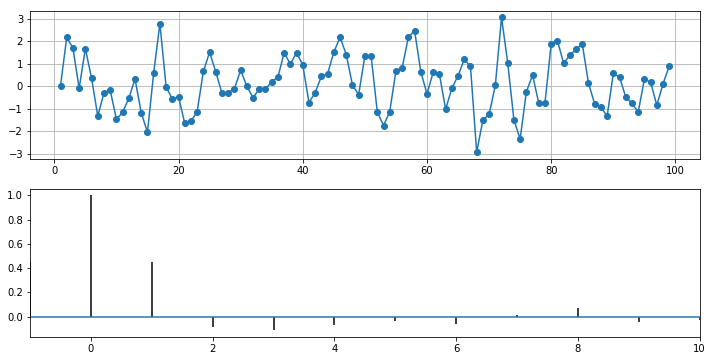

In [39]:
np.random.seed(5)
e = np.random.normal(0,1,100)
beta = 0.8
e_df = pd.DataFrame(e,columns=["e_t"])
e_df['e_t-1'] = e_df["e_t"].shift(1)
# MA(1)
y_t = e_df["e_t"] + beta * e_df['e_t-1']

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(211)
ax1.plot(y_t, marker='o')
ax1.grid()

ax2 = fig.add_subplot(212)
ax2.set_xlim([-1,10])
acf = ax2.acorr(y_t.dropna())

## Autoregressisve process (AR)
$$y_t = \epsilon_t + \alpha\epsilon_{t-1}+\alpha^2\epsilon_{t-2}+...$$
AR(1):
$$y_t = \epsilon_t + \alpha y_{t-1}$$

positive alpha => momentum <br>
negative alpha => mean reversion <br>
$-1 < \alpha <1 $ to make it a stationary process. <br>
if $\alpha = 1$, it's random walk . <br>
if $\alpha = 0$, it's a white noise. <br>

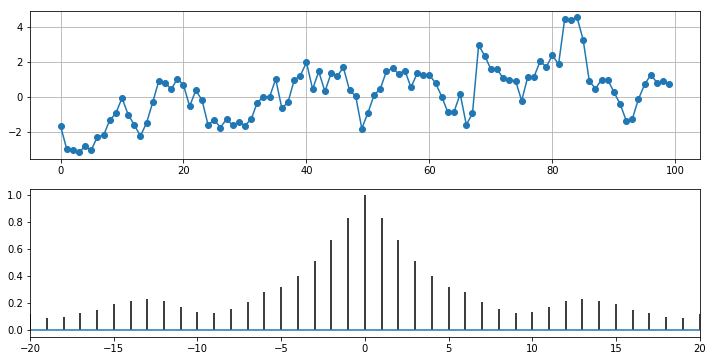

In [49]:
e = np.random.normal(0,1,100)
alpha1 = 0.7
y_t = list()
y_t.append(e[0])
for t in range(1,100):
    y_t.append(alpha1 * y_t[t-1] + e[t])

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(211)
ax1.plot(y_t, marker='o')
ax1.grid()

ax2 = fig.add_subplot(212)
ax2.set_xlim([-20,20])
acf = ax2.acorr(y_t, maxlags=20)

## ARMA
$$y_t = [\alpha_{1} y_{t-1}+\alpha_{2} y_{t-2}+...+\alpha_{p} y_{t-p}]+[\epsilon_t + \beta_1\epsilon_{t-1}+...+\beta_q\epsilon_{t-q}]$$

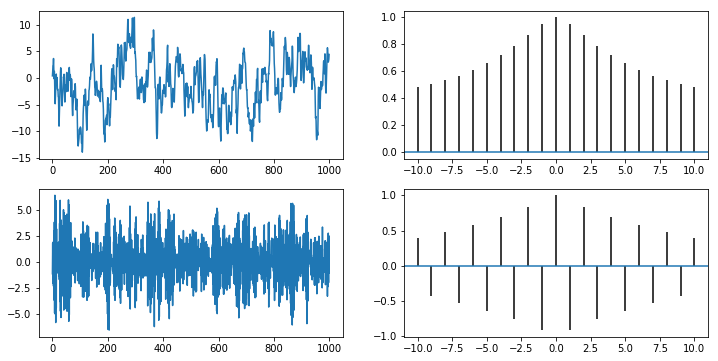

In [62]:
from statsmodels.tsa.arima_process import ArmaProcess
plt.figure(figsize=(12,6))
# Plot 1: AR alpha = +0.9
plt.subplot(2,2,1)
ar1 = np.array([1, -0.9]) # should be [p,-alpha]
ma1 = np.array([1,1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plt.subplot(2,2,2)
acorr1 = plt.acorr(simulated_data_1)

# Plot 2: AR alpha = -0.9
plt.subplot(2,2,3)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.subplot(2,2,4)
acorr2 = plt.acorr(simulated_data_2)